# Pasos:
## 1.- Carga de datos
## 2.- Desarrollo

# 1.- Carga de datos

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Leemos los datos con python:
train = pd.read_csv("C:\\Users\\mojic\\Desktop\\IsaacMot\\RegresionLinealSimple\\data\\train.csv")
test = pd.read_csv("C:\\Users\\mojic\\Desktop\\IsaacMot\\RegresionLinealSimple\\data\\test.csv")

In [6]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# 2.- Desarrollo

In [7]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [8]:
train[['GrLivArea','SalePrice']].head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


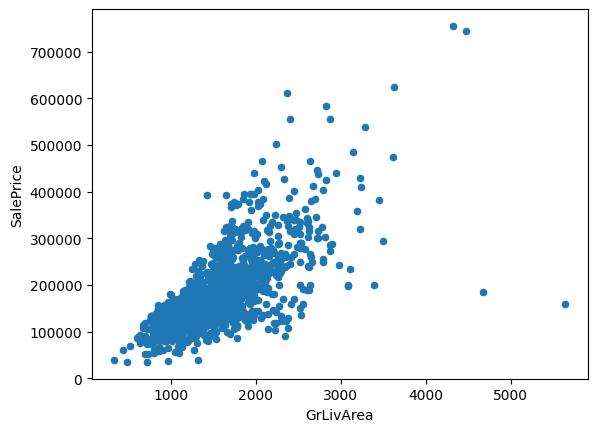

In [10]:
train.plot.scatter(x = 'GrLivArea', y = 'SalePrice')
plt.show()

In [11]:
train['GrLivArea'].min()

334

In [36]:
# Parámetros de la recta
m = 118.06
b = 0

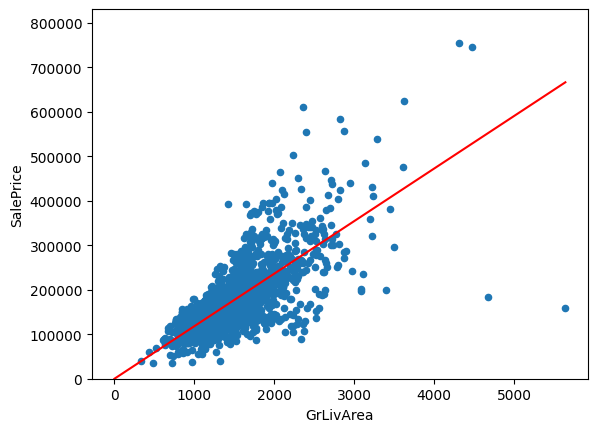

In [37]:
# Puntos de la recta
x = np.linspace(0, train['GrLivArea'].max(), 100)
y = m*x + b

# Gráfica de la recta
train.plot.scatter(x = 'GrLivArea', y = 'SalePrice')
plt.plot(x, y, '-r')
plt.ylim(0, train['SalePrice'].max()*1.1)
#plt.grid()
plt.show()

In [22]:
train['pred'] = train['GrLivArea'] * m + b

In [24]:
train['diff'] = train['pred'] - train['SalePrice']
train['cuad'] = train['diff'] ** 2
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,256500,48000,2304000000
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,189300,7800,60840000
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,267900,44400,1971360000
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,2,2006,WD,Abnorml,140000,257550,117550,13818002500
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,12,2008,WD,Normal,250000,329700,79700,6352090000


In [25]:
train['cuad'].mean()

5799776065.368493

In [26]:
m = np.linspace(50, 200, 50)
grid_error = pd.DataFrame(m, columns = ['m'])
grid_error.head()

,m
0,50.000000
1,53.061224
2,56.122449
3,59.183673
4,62.244898


In [27]:
def sum_error(m, train):
    b = 0
    train['pred'] = train['GrLivArea'] * m + b
    train['diff'] = train['pred'] - train['SalePrice']
    train['cuad'] = train['diff'] ** 2
    return (train['cuad'].mean())

In [29]:
grid_error['error'] = grid_error['m'].apply(lambda x: sum_error(x, train = train))
grid_error.head()

,m,error
0,50.000000,1.509658e+10
1,53.061224,1.404857e+10
2,56.122449,1.304878e+10
3,59.183673,1.209720e+10
4,62.244898,1.119384e+10


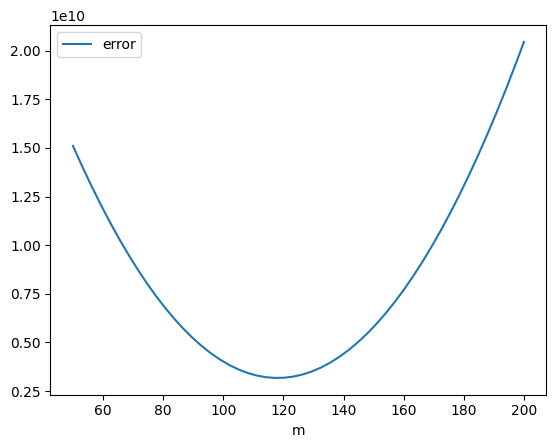

In [30]:
grid_error.plot(x = 'm', y = 'error')
plt.show()

In [33]:
# Usamos sklearn para obtener los valores optimos
from sklearn.linear_model import LinearRegression

# definimos el input y el output
X_train = np.array(train['GrLivArea']).reshape((-1,1))
Y_train = np.array(train['SalePrice'])

# Creamos el modelo
model = LinearRegression(fit_intercept = False)
model.fit(X_train, Y_train)

# imprimir parámetros
print(f"intersección con eye y (b): {model.intercept_}")
print(f"pendiente (m): {model.coef_}")

intersección con eye y (b): 0.0
pendiente (m): [118.06909986]
